<h3><b>Introduction</b></h3>

<p>The objective of this study is to explore the data contained in the well known 'mushroom' dataset -
see the following link in order to access the mushroom data, along with a description of the data content.</p>
<a href = "https://www.kaggle.com/uciml/mushroom-classification">https://www.kaggle.com/uciml/mushroom-classification</a>
    
<p>The data consists of 8124 observations of mushrooms (of varying species), with each observation being a vector of
categorical values associated with the following features:-</p>

<ul>
<li>cap-shape, cap-surface, cap-color</li>
<li>veil-type, veil-color</li>
<li>gill-attachment, gill-spacing, gill-size, gill-color</li> 
<li>ring-number, ring-type</li>
<li>stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring</li>
<li>spore-print-color</li>
<li>poulation</li>
<li>habitat</li>
<li>bruises</li>
<li>odor</li>
</ul>

<p>Each observation is also associated with a response variable 'class' which 
attains a value 'e' for edible and 'p' for poisonous. A portion of the dataset may be used to train
a machine learning model to use the feature values of a mushroom sample to predict whether the sample
is edible or poisonous. To this end, the study presented here seeks to demonstrate that certain of the
above listed features have more informational value than others - it will be seen that the edibility of a mushroom could
be characterized by just three of those features.</p>

<h3><b>Python Code</b></h3>

In [ ]:
# Import all the libraries required for the study.

import pandas as pd
import matplotlib.pyplot as plt
import math 

In [37]:
# The mushroom data came from:
# https://www.kaggle.com/uciml/mushroom-classification
# Create a pandas dataframe from the data.

df = pd.read_csv("mushrooms.csv")

<h3><b>Data Exploration</b></h3>

In [38]:
# How many observations are there ?

print(len(df))

8124


In [39]:
# What features are available ? Note that the first variables, 'class' is the target variable,
# indicating whether the mushroom is edible or not.

print(df.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [45]:
# The 'class' variables contains to categories, 'e' for edible and 'p' for poisonous.

print(df['class'].unique())
print(df['class'].value_counts())

['p' 'e']
e    4208
p    3916
Name: class, dtype: int64


In [41]:
# Are there any features that contain a single class ? If so, drop the relevant column as they
# do not provide any useful information.

for xx in df.columns:
    if df[xx].nunique() < 2: 
        print("Dropping the feature: ", xx)
        df.drop(xx, axis=1, inplace=True)

Dropping the feature:  veil-type


In [46]:
# If we were to do a one-hot encoding of the data, how many features would we derive (save
# for the target variable 'class').

print(sum([df[xx].nunique() for xx in df.columns[1:]]))

# Note that both the 'edible' and 'poisonous' categories of the response variable 'class' contain a
# number of observations that is greater than 10 times the number of potential features to 
# be used by the machine learning alogrithm (> 10 * 116).

116


In [47]:
# So a one-hot encoding of the useful features will give as 116 independent variables.
# What sort of values do each of the features' categories attain ?

for xx in df.columns:
    print(xx, df[xx].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


<h3><b>Data Normalization</b></h3>
<p>One-hot encoding is performed in order to transform the exclusively categorical data into a normalized numeric 
form that a machine learning algorithm can use. This involves generating a separate feature for each potential value
that each feature could attain, with a '1' denoting that the value has been attained for any given observation 
(and '0' otherwise). </p>

In [48]:
# Create the transformed dataframe, dg by performing a on-hot encoding of each of the independent features in the
# original dataframe, df.

dg = pd.concat([pd.get_dummies(df[col], prefix=col) for col in df.columns[1:]], axis=1)
dg = pd.concat([dg, df['class']], axis=1)

In [49]:
# Transform the values of the response variable 'class'.

dg.loc[dg['class']=='p', 'class'] = 1
dg.loc[dg['class']=='e', 'class'] = 0

In [50]:
# Check that the one-hot encoding is producing the expected values. We need to make sure
# that each encoded feature attains values from the set {0, 1}.

bValuesOK = True
for xx in dg.columns:
    if set([0,1]) != set(dg[xx].unique()):
        print(xx, 'Not Ok')
        bValuesOK = False

if bValuesOK: print("One-hot encoding was successful.")

One-hot encoding was successful.


In [51]:
# Save the normalized data set to a csv file.
dg.to_csv("mushrooms_one_hot_encoded.csv")

<h3><b>Informational Value</b></h3>
<p>Which of the dependent variables have high informational value when used to 
predict the outcome of the response/target variable? We will measure the information gain (with
respect to the target) as a means of assessing whether partitioning a dataset using the values of a
given independent variable is any more informative than partitioning the dataset based on the values
of another independent variable.</p>

<p>The entropy of a dataset with respect to a categorical target variable $T$ is given by:</p>
$$ H_T = - \sum_{i=1}^{n_T} p_i log(p_i)$$
<p>where $n_T$ is the cardinality (number of categories) of the variable $T$ and $p_i$ is the relative frequency of the
$i$th category.</p>
<p>The split entropy, $S_T(C)$ incurred by assessing the entropy of the datset when partitioned based on values
of categorical variable $C$ is given by:</p>
    
$$ S_T(C) = \sum_{j=1}^{n_C} p_j H_T(C_j)$$
<p>where $n_C$ is the cardinality of the variable $C$, $p_j$ is the relative frequency of category $C_j$ 
within the dataset and $H_T(C_j)$ is the entropy of the data contained in $C_j$ with respect to the target variable $T$. 
In essence, the split entropy for a given feature is the sum of the weighted entropies for each set of observations that
is created by partitioning the observations based on the feature's values.</p>

<p>The information gain $I_T(C)$ with respect to the target variable that is afforded by variable $C$ is defined as follows:</p>

$$I_T(C) =  H_T - S_T(C) $$

<p>The objective of finding the most informative variable is tantamount 
to establishing which variable $C = C_{max}$ maximizes the information gain $I_T(C)$.</p>

In [53]:
# Define the 'df_entropy' function which caluclates the informational entropy of the values observed
# for the variable with the column name 'target_col'.

def df_entropy(df, target_col):
    # Returns the entropy of a dataframe with respect to the feature whose column name is 'target_col'.
    
    vals = [xx*math.log(xx) for xx in df[target_col].value_counts(normalize=True).values]
    return -sum(vals)

In [54]:
# The split entropy is defined here.

def df_split_entropy(df, split_col, target_col):
    
    # Returns the split entropy of a dataframe with respect to the feature whose column name is 'target_col'
    # due to a partition of the dataframe based on values of the variable with column name 'split_col'.
    
    pvals = df[split_col].value_counts(normalize=True)
    
    res = 0.0
    for xx in df[split_col].unique():
        ent = df_entropy(df.loc[df[split_col]==xx], target_col)
        res += pvals[xx] * ent
        
    return res

In [55]:
# Sort the features (independent variables) by the amount of information gain (with respect to the target variable 'class')
# that is acheived by partitioning the entire dataset using each feature's values. The information gains are 
# sorted into in descending order, i.e. with the features that provide the least amount of information gain appearing earlier
# in the sorted list.
# This is equivalent to sorting the features based on the split entropy (with respect to the target variable 'class')
# in descending order. In other words, the features that reduce the entropy the least are at the top of the list.

entropy_list = [(xx, df_split_entropy(df, xx, 'class')) for xx in df.columns]
sorted_entropies = sorted(entropy_list, key=lambda x: x[1], reverse=True)
print(sorted_entropies)

# Note that the least informative variable is 'veil-type' whereas the most informative of the independent variables is 'odor'.

[('stalk-shape', 0.687290866191527), ('gill-attachment', 0.6826826472037806), ('veil-color', 0.6759923983315359), ('cap-surface', 0.6726838566664071), ('cap-color', 0.6675136370489368), ('ring-number', 0.6658477366342479), ('cap-shape', 0.6586777995379722), ('gill-spacing', 0.6225742013519672), ('stalk-root', 0.5990526304940016), ('habitat', 0.5837923250560274), ('bruises', 0.5591537977521386), ('population', 0.5525144643974397), ('gill-size', 0.5329702396776961), ('stalk-color-below-ring', 0.5251645766232353), ('stalk-color-above-ring', 0.5165490296209984), ('stalk-surface-below-ring', 0.5040382082630868), ('stalk-surface-above-ring', 0.4951443495735666), ('ring-type', 0.47206538234114526), ('gill-color', 0.4034743011923401), ('spore-print-color', 0.3593018375305005), ('odor', 0.06445777995546445), ('class', 0.0)]


Text(0.5, 1.0, 'Information Gain for Each Feature')

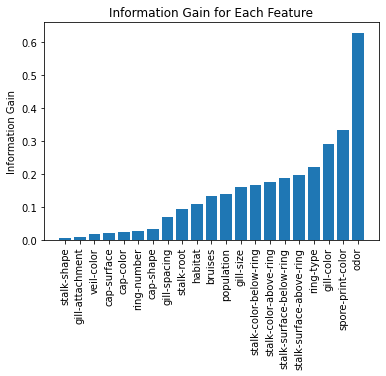

In [56]:
# Create a bar chart of the information gain that can be reaped by partitioning the observations
# based on values attained by each independent variable.

xcoords = range(len(sorted_entropies)-1)
heights = [class_entropy-xx[1] for xx in sorted_entropies[:-1]]
labels =  [xx[0] for xx in sorted_entropies[:-1]]

plt.bar(xcoords, heights, tick_label = labels)
plt.xticks(rotation=90)
plt.ylabel("Information Gain")
plt.title("Information Gain for Each Feature")

<h3><b>Analyzing the Effect of Dropping Uninformative Features</b></h3>

<p>The normalized observation data will be used (as part of a separate study) to train a neural network in order 
to predict from observed feature values whether a mushroom is edible or poisonous. In order to perform an experiment
concerning how parsimonious the nerual netwrok model need be, a series of normalized datasets is now constructed, 
with each dataset progressively making use of fewer of the least informative features. 
The recall score that is obtained by assessing a trained neural network on hold-out (test) data
will then be used to see whether reducing the number of uninformative features helps to improve model performance.</p>

<p>For the purpose of this study, the recall score is given by $R$ as follows: </p>
$$ R = {{TP} \over {TP + FE}} $$

<p> where $P$ refers to poisonous and $E$ refers to edible - the rationale being that we would wish to predict as many
poisonous mushrooms as possible from those that are observed to be poisonous. </p>


In [59]:
# Create a series of CSV files that contain datasets that progressively exclude more and more of the less 
# informative variables.

for i in range(len(df.columns)-2):   # Note that the final column is the repsonse/target variable.
    drop_col_stems = [x[0] for x in sorted_entropies[:i+1]]
    
    drop_cols = [x for x in dg.columns if any([(stem in x) for stem in drop_col_stems])]
    
    dg.drop(drop_cols, axis=1, inplace=True)
    dg.to_csv(f"mushrooms_one_hot_encoded_partial_{i}.csv")